In [1]:
%matplotlib inline
import numpy as np
import pylab as P
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pds

In [2]:
data=pds.read_csv('conf.csv')
data

Unnamed: 0  sep_buffer  crowder_potential  v1000  areafrac_1000  \
0           0       5.750                0.0    0.0            1.0   
1           1       1.750                0.0    0.0            1.0   
2           2       1.000                0.0    0.0            1.0   
3           3       0.425                0.0    0.0            1.0   
4           4       0.300                0.0    0.0            1.0   
5           5       0.030                0.0    0.0            1.0   

   vol_domain_fenics  vol_domain_net  vol_pore_net  free_vol_fraction  \
0       14749.416777    14780.878145  12257.878145           0.995358   
1       14421.891843    14437.884488  11914.884488           0.967507   
2       14290.128924    14299.898534  11776.898534           0.956302   
3       13198.780733    13203.895813  10680.895813           0.867305   
4       13101.942078    13105.334418  10582.334418           0.859301   
5       10355.356491    10310.133234   7787.133234           0.632327   

   inclusion_count  area_1000  area_1001  totflux_A_1000  totflux_A_pore  \
0              7.0  49.790771        0.0        0.002288        0.000107   
1             94.0  49.790771        0.0        0.002225        0.000101   
2            129.0  49.790771        0.0        0.002197        0.000100   
3            407.0  52.146443        0.0        0.001971        0.000083   
4            432.0  50.517837        0.0        0.001956        0.000083   
5           1141.0  61.214578        0.0        0.001215        0.000048   

   totflux_B_1000  totflux_B_pore  pore_conc_A  pore_conc_B  
0       -0.002218        0.000877          NaN          NaN  
1       -0.002164        0.000852          NaN          NaN  
2       -0.002140        0.000842          NaN          NaN  
3       -0.001934        0.000748          NaN          NaN  
4       -0.001924        0.000743          NaN          NaN  
5       -0.001140        0.000458          NaN          NaN

In [3]:
p25=data[data["crowder_potential"]==0.025]
p10=data[data["crowder_potential"]==0.01]
neut=data[data["crowder_potential"]==0.0]
n10=data[data["crowder_potential"]==-0.01]
n25=data[data["crowder_potential"]==-0.025]



In [4]:
phia=neut["vol_domain_net"]
phi=phia.iloc[0:-1]
phi=phi/np.max(phi)

In [5]:
#data = pd.read_csv("results_for_p25mv.csv")
phia=neut["vol_pore_net"]
phi=phia.iloc[0:]
phi=phi/np.max(phi)


kp25a=p25["totflux_A_1000"]
kp25=kp25a.iloc[0:-1]
kp10a=p10["totflux_A_1000"]
kp10=kp10a.iloc[0:-1]
kneuta=neut["totflux_A_1000"]
kneut=kneuta.iloc[0:]
kn10a=n10["totflux_A_1000"]
kn10=kn10a.iloc[0:-1]
kn25a=n25["totflux_A_1000"]
kn25=kn25a.iloc[0:-1]
########################
kpi=kneut.iloc[0]
print(kneut)
#print(lkneut.iloc[0])

0    0.002288
1    0.002225
2    0.002197
3    0.001971
4    0.001956
5    0.001215
Name: totflux_A_1000, dtype: float64


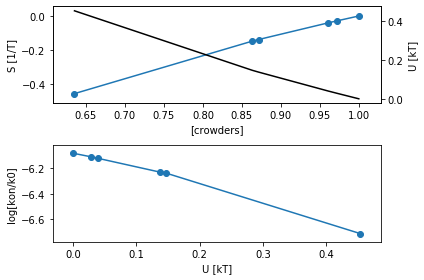

In [6]:
H=0.
L=1
T=1.
N=1. # arbitrary, but should normalize somehow
Ss = L*np.log(phi) - L*np.log(L) - L
offset = 1. # using this since sloppy w units, etc
Ss += offset
fig,(axl,ax2) = plt.subplots(2)
# S vs U
axl.scatter(phi, Ss)
axl.plot(phi, Ss,label='S')
axl.set_ylabel("S [1/T]")

axr = axl.twinx()

Us = H - T*Ss
#print('phi and Us are %s %s'%(phi,Us))
axr.plot(phi, Us,'k')
axl.set_xlabel("[crowders]")
axr.set_ylabel("U [kT]")
#
#kons = data[:,3]
#k0 = np.max(kons)
#lkok0 = np.log(kons/k0)
ax2.scatter(Us,np.log(kneut))
ax2.plot(Us,np.log(kneut))
#ax2.set_ylim(0.001,0.0021)
ax2.plot()

ax2.set_ylabel("log[kon/k0]")
ax2.set_xlabel("U [kT]")
#
lkneut=np.log(kneut/kneut.iloc[0])
#print(lkneut.iloc[0])
#print((lkneut.iloc[-1]))
#print(np.max(lkneut))
#print(lkneut)
#lkneut=lkneut/(lkneut.iloc[-1])
#print(Us.iloc[0])
plt.tight_layout()

In [10]:
plt.scatter(phi.iloc[:-1],-Us.iloc[:-1],color='blue',s=100,label='Analytical')
plt.plot(phi.iloc[:-1],-Us.iloc[:-1],color='blue')
plt.scatter(phi.iloc[:-1],lkneut.iloc[:-1],marker='s',color='green',s=135,label='Simulation',facecolors='none')
plt.plot(phi.iloc[:-1],lkneut.iloc[:-1],color='green',linewidth=0.4)
#cmap = sns.cubehelix_palette(dark=0.3, light=.8, as_cmap=True)
#g=sns.scatterplot(phi,lkneut,hue=phi,size=phi-0.05,sizes=(100,100),palette=cmap)
plt.xlabel("Crowders",fontsize=18)
#plt.tick_params(axis='y',labelsize=14)
#plt.tick_params(axis='x',labelsize=14)
plt.ylabel("$\ln{(k_{on}/k_0)}$",fontsize=18)
plt.xlabel("Accessible volume Fraction$\phi$",fontsize=18)
#
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#axl.legend(fontsize=16)
plt.ylim(-0.2,.017)
#
#plt.xlim(0.85,1.01)
params = {'legend.fontsize': 16,'legend.handlelength': 3}
plt.rcParams.update(params)
plt.rc('figure', figsize=(10, 5))
plt.gcf().savefig("term_of_conf.png",dpi=300)
plt.show()

In [11]:
cp term_of_conf.png /Users/hadirahmaninejad/Desktop/.